# Basins

In [2]:
from shapely import MultiPolygon
import matplotlib.pyplot as plt

import huracanpy

In [3]:
# Basins defined in huracanpy

huracanpy.utils.geography.basins_def["WMO"]

,geometry
SI,"POLYGON ((20.000 -90.000, 20.000 0.000, 90.000..."
AUS,"POLYGON ((90.000 -90.000, 90.000 0.000, 160.00..."
SP,"POLYGON ((160.000 0.000, 160.000 -90.000, 295...."
SA,"MULTIPOLYGON (((295.000 -90.000, 295.000 0.000..."
NATL,"POLYGON ((260.000 90.000, 360.000 90.000, 360...."
ENP,"POLYGON ((220.000 90.000, 260.000 90.000, 260...."
CP,"POLYGON ((180.000 0.000, 180.000 90.000, 220.0..."
WNP,"POLYGON ((100.000 0.000, 100.000 90.000, 180.0..."
NI,"POLYGON ((30.000 0.000, 30.000 90.000, 100.000..."
MED,"POLYGON ((0.000 0.000, 0.000 90.000, 30.000 90..."


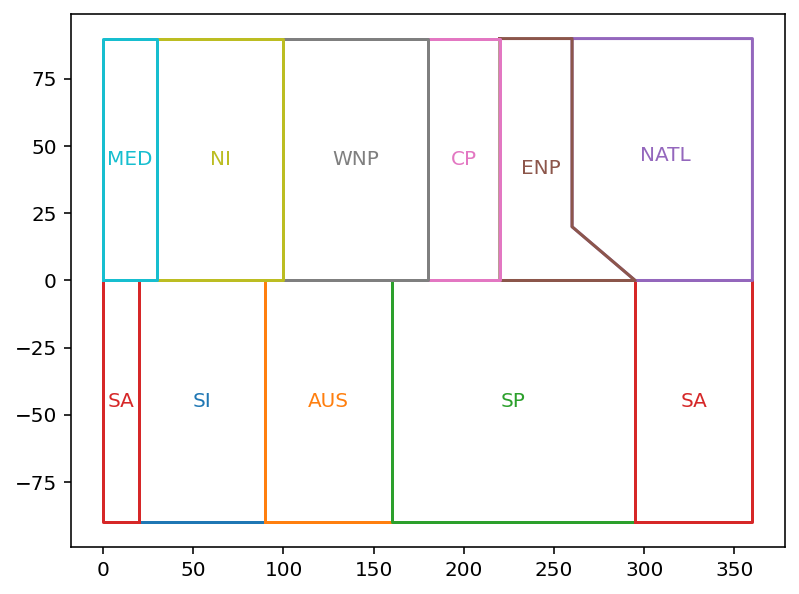

In [4]:
# Plot basins
# Default defined from 0-360.
for n, (basin, geometry) in enumerate(
    huracanpy.utils.geography.basins_def["WMO"].iterrows()
):
    # South Atlantic (SA) crosses dateline so is defined as two regions
    if isinstance(geometry.geometry, MultiPolygon):
        for geom in geometry.geometry.geoms:
            x, y = geom.exterior.xy
            plt.plot(x, y, color=f"C{n}")
            x, y = geom.centroid.xy
            plt.text(x[0], y[0], basin, color=f"C{n}", ha="center", va="center")
    else:
        plt.plot(*geometry.geometry.exterior.xy, color=f"C{n}")
        x, y = geometry.geometry.centroid.xy
        plt.text(x[0], y[0], basin, color=f"C{n}", ha="center", va="center")

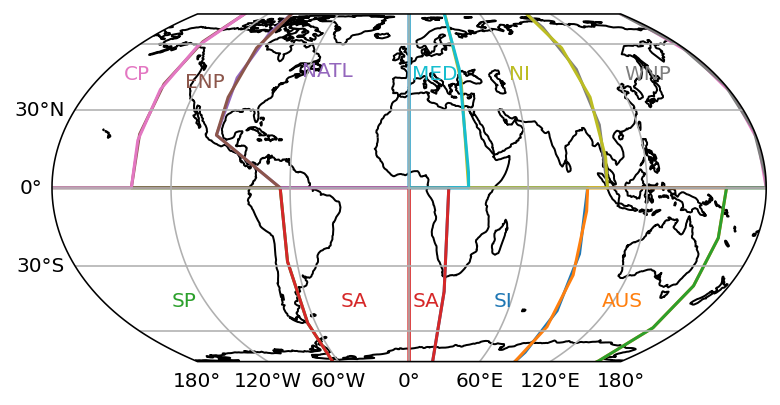

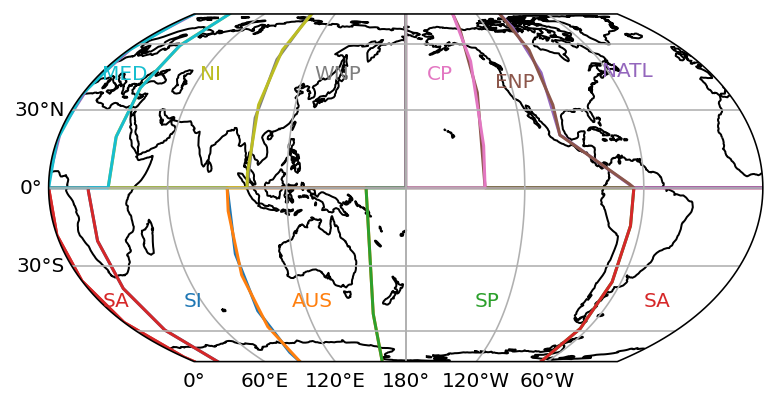

In [5]:
# Plot basins with Cartopy projections
# Essentially the same as the previous panel

from cartopy.crs import EqualEarth, Geodetic

transform = Geodetic()

for central_longitude in [0, 180]:
    plt.figure()
    ax = plt.axes(projection=EqualEarth(central_longitude=central_longitude))

    for n, (basin, geometry) in enumerate(
        huracanpy.utils.geography.basins_def["WMO"].iterrows()
    ):
        if isinstance(geometry.geometry, MultiPolygon):
            for geom in geometry.geometry.geoms:
                plt.plot(*geom.exterior.xy, color=f"C{n}", transform=transform)
                x, y = geom.centroid.xy
                plt.text(
                    x[0],
                    y[0],
                    basin,
                    color=f"C{n}",
                    ha="center",
                    va="center",
                    transform=transform,
                )
        else:
            plt.plot(*geometry.geometry.exterior.xy, color=f"C{n}", transform=transform)
            x, y = geometry.geometry.centroid.xy
            plt.text(
                x[0],
                y[0],
                basin,
                color=f"C{n}",
                ha="center",
                va="center",
                transform=transform,
            )

    ax.coastlines()
    ax.gridlines(draw_labels=["left", "bottom"])